In [133]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import lxml
import requests
import matplotlib

In [379]:
url = 'https://www.bls.gov/cps/cpsaat01.htm'

In [380]:
result = requests.get(url)
c = result.content

In [381]:
soup = BeautifulSoup(c)

In [382]:
soup


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<!-- P2 -->
<title>Employment status of the civilian noninstitutional population, 1949 to date</title>
<!-- ********************************** Begin META TAGS ********************************** -->
<meta content="Current Population Survey (CPS) data, 2019 annual averages" name="description"/>
<meta content="01/22/2020" name="date"/>
<!-- START include/global/head_express.stm -->
<script id="_fed_an_ua_tag" language="javascript" src="https://dap.digitalgov.gov/Universal-Federated-Analytics-Min.js?agency=DOL&amp;subagency=BLS&amp;yt=true"></script>
<script src="/javascripts/jquery-latest.js"></script>
<script src="/javascripts/bls-latest.js"></script>
<script src="/javascripts/jquery-tools.js"></script>
<script src="/javascripts/jquery-migrate-1.2.1.min.js"></script>
<script>
(function (g) {
var d = document, am = d.createElement('script'), h = d.head || d.getElementsByTag

In [383]:
summary = soup.find_all('table',{'class':'regular','id':'cps_eeann_year'})
summary2 = soup.find_all('tr',{'class':'greenbar'})

In [384]:
summary

[<table class="regular" id="cps_eeann_year">
 <caption><span class="tableTitle">HOUSEHOLD DATA<br/> ANNUAL AVERAGES<br/> 1.  Employment status of the civilian noninstitutional population, 1949 to date</span>
 <span class="headnote">[Numbers in thousands]</span></caption>
 <thead>
 <tr>
 <th class="stubhead" id="cps_eeann_year.h.1.1" rowspan="3">Year</th>
 <th class="stubhead" id="cps_eeann_year.h.1.2" rowspan="3">Civilian noninstitutional population</th>
 <th class="stubhead" colspan="8" id="cps_eeann_year.h.1.3">Civilian labor force</th>
 <th class="stubhead" id="cps_eeann_year.h.1.11" rowspan="3">Not<br/>in<br/>labor<br/>force</th>
 </tr>
 <tr>
 <th class="stubhead" headers="cps_eeann_year.h.1.3" id="cps_eeann_year.h.2.3" rowspan="2">Total</th>
 <th class="stubhead" headers="cps_eeann_year.h.1.3" id="cps_eeann_year.h.2.4" rowspan="2">Percent<br/>of<br/>population</th>
 <th class="stubhead" colspan="4" headers="cps_eeann_year.h.1.3" id="cps_eeann_year.h.2.5">Employed</th>
 <th class="

In [385]:
summary[0]

<table class="regular" id="cps_eeann_year">
<caption><span class="tableTitle">HOUSEHOLD DATA<br/> ANNUAL AVERAGES<br/> 1.  Employment status of the civilian noninstitutional population, 1949 to date</span>
<span class="headnote">[Numbers in thousands]</span></caption>
<thead>
<tr>
<th class="stubhead" id="cps_eeann_year.h.1.1" rowspan="3">Year</th>
<th class="stubhead" id="cps_eeann_year.h.1.2" rowspan="3">Civilian noninstitutional population</th>
<th class="stubhead" colspan="8" id="cps_eeann_year.h.1.3">Civilian labor force</th>
<th class="stubhead" id="cps_eeann_year.h.1.11" rowspan="3">Not<br/>in<br/>labor<br/>force</th>
</tr>
<tr>
<th class="stubhead" headers="cps_eeann_year.h.1.3" id="cps_eeann_year.h.2.3" rowspan="2">Total</th>
<th class="stubhead" headers="cps_eeann_year.h.1.3" id="cps_eeann_year.h.2.4" rowspan="2">Percent<br/>of<br/>population</th>
<th class="stubhead" colspan="4" headers="cps_eeann_year.h.1.3" id="cps_eeann_year.h.2.5">Employed</th>
<th class="stubhead" colsp

In [386]:
data = []

rows = summary[0].findAll('tr')

for tr in rows:
    cols1 = tr.findAll('th')
    cols2 = tr.findAll('td')
    
    for th in cols1:
        text = th.find(text=True)
        print(text)
        data.append(text)
        
    for td in cols2:
        text = td.find(text=True)
        print(text)
        data.append(text)

Year
Civilian noninstitutional population
Civilian labor force
Not
Total
Percent
Employed
Unemployed
Total
Percent
Agri-
Nonagri-
Number
Percent
Persons 16 years of age and over
None
1949
103,994
61,286
58.9
57,651
55.4
7,658
49,993
3,637
5.9
42,708
1950
104,995
62,208
59.2
58,918
56.1
7,160
51,758
3,288
5.3
42,787
1951
104,621
62,017
59.2
59,961
57.3
6,726
53,235
2,055
3.3
42,604
1952
105,231
62,138
59.0
60,250
57.3
6,500
53,749
1,883
3.0
43,093
1953
107,056
63,015
58.9
61,179
57.1
6,260
54,919
1,834
2.9
44,041
1954
108,321
63,643
58.8
60,109
55.5
6,205
53,904
3,532
5.5
44,678
1955
109,683
65,023
59.3
62,170
56.7
6,450
55,722
2,852
4.4
44,660
1956
110,954
66,552
60.0
63,799
57.5
6,283
57,514
2,750
4.1
44,402
1957
112,265
66,929
59.6
64,071
57.1
5,947
58,123
2,859
4.3
45,336
1958
113,727
67,639
59.5
63,036
55.4
5,586
57,450
4,602
6.8
46,088
1959
115,329
68,369
59.3
64,630
56.0
5,565
59,065
3,740
5.5
46,960
1960
117,245
69,628
59.4
65,778
56.1
5,458
60,318
3,852
5.5
47,617
1961
118,771


In [387]:
headers = data[:15]

In [388]:
data = data[16:]

In [389]:
data.remove('\n')
while '' in data:
    data.remove('')

In [390]:
type(data[0])

bs4.element.NavigableString

In [391]:
data = [str(x) for x in data]
data = [x.replace(',','') for x in data]

In [392]:
newdata = []

for i in data:
    result = float(i)
    newdata.append(result)

# for i in data:
#     if '.' in i:
#         result = float(i)
#         newdata.append(result)
#     else:
#         result = int(i)
#         newdata.append(result)

In [393]:
newdata = list(newdata)

In [394]:
type(newdata[1])

float

In [395]:
columns = ['Year','Civilian noninstituational population','Civilian labor force - Total', 'Civilian labor force - % of Population', 'Employed - Total', 'Employed - Percent of Population', 'Employed - Agriculture','Employed - Non Agriculture','Unemployed - Total','Unemployed - Percent of Population','Not in Labor Force']

In [396]:
df = pd.DataFrame(np.array(newdata).reshape(71,11),columns=columns)

In [397]:
headers

['Year',
 'Civilian noninstitutional population',
 'Civilian labor force',
 'Not',
 'Total',
 'Percent',
 'Employed',
 'Unemployed',
 'Total',
 'Percent',
 'Agri-',
 'Nonagri-',
 'Number',
 'Percent',
 'Persons 16 years of age and over']

In [398]:
df.Year = df.Year.astype(int)
df.set_index('Year',inplace=True)

In [399]:
pop = df[['Civilian noninstituational population']]

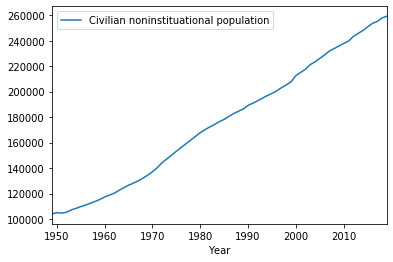

In [400]:
pop.plot()

In [401]:
percent_employed = df[['Employed - Percent of Population']]
percent_unemployed = df[['Unemployed - Percent of Population']]

In [402]:
df.head(2)

,Civilian noninstituational population,Civilian labor force - Total,Civilian labor force - % of Population,Employed - Total,Employed - Percent of Population,Employed - Agriculture,Employed - Non Agriculture,Unemployed - Total,Unemployed - Percent of Population,Not in Labor Force
Year,,,,,,,,,,
1949,103994.0,61286.0,58.9,57651.0,55.4,7658.0,49993.0,3637.0,5.9,42708.0
1950,104995.0,62208.0,59.2,58918.0,56.1,7160.0,51758.0,3288.0,5.3,42787.0


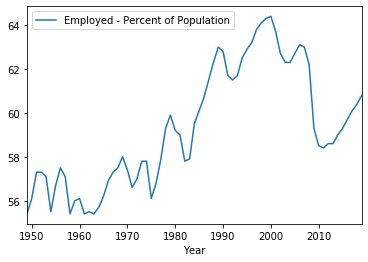

In [403]:
percent_employed.plot()
#Dips are likely due to recessions and spikes are likely due to industry booms, such as tech.

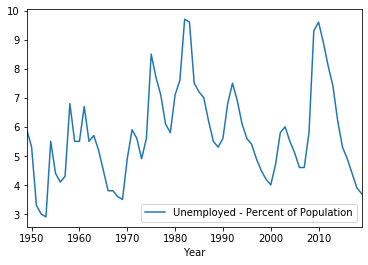

In [404]:
percent_unemployed.plot()
#Spikes are likely due to recessions/wars - prime example is spike around 2009 from the banking crash.

In [378]:
agri = df[['Employed - Agriculture', 'Employed - Non Agriculture']]

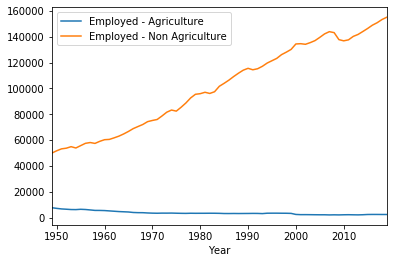

In [374]:
agri.plot()
#### agriculture steadily declined while Non Agriculture increased at a very high rate, due to industrial and technological booms.

In [372]:
laborforce = df[['Civilian labor force - % of Population']]

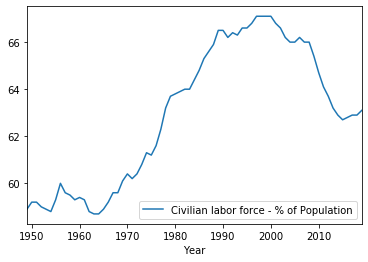

In [373]:
laborforce.plot()